In [1]:
import sys

sys.path.insert(0, '..')
from typing import Dict, Any
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from data_utils import RESULTS_DIR, COST_MATRIX_FILE_DICT, FIGURE_DIR, \
    COST_INFORMED_PRIOR_FILE, CIFAR100_CLASSES, CIFAR100_SUPERCLASSES, CIFAR100_REVERSE_SUPERCLASS_LOOKUP

RESULTS_DIR = RESULTS_DIR + 'costs/cifar100/'
import matplotlib;matplotlib.rcParams['font.size'] = 10
import matplotlib;matplotlib.rcParams['font.family'] = 'serif'

LINEWIDTH = 13.97
LOG_FREQ = 10

In [2]:
class_idx = {s: i for i, s in enumerate(CIFAR100_CLASSES)}
superclass_idx = {s: i for i, s in enumerate(CIFAR100_SUPERCLASSES)}
superclass_lookup = {}
for superclass, class_list in CIFAR100_REVERSE_SUPERCLASS_LOOKUP.items():
    for _class in class_list:
        superclass_lookup[class_idx[_class]] = superclass_idx[superclass]

new_idx = []
for superclass_name in CIFAR100_REVERSE_SUPERCLASS_LOOKUP:
    for class_name in CIFAR100_REVERSE_SUPERCLASS_LOOKUP[superclass_name]:
        new_idx.append(class_idx[class_name])
new_idx = np.array(new_idx)

/Users/disiji/Dropbox/current/bayesian-blackbox/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


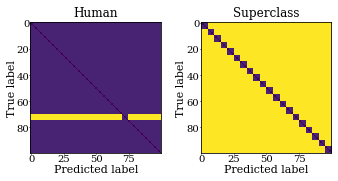

In [3]:
def plot_cost_matrix(new_idx):
    fig, axes = plt.subplots(1, 2, figsize=(LINEWIDTH * 0.4, 2.4),
                        gridspec_kw = {'wspace':0.2, 'hspace':0.25})

    axes[0].imshow(np.load(COST_MATRIX_FILE_DICT['human'])[:, new_idx][new_idx, :].T)
    axes[1].imshow(np.load(COST_MATRIX_FILE_DICT['superclass'])[:, new_idx][new_idx, :].T)
    axes[0].set_title('Human', fontsize=12)
    axes[1].set_title('Superclass', fontsize=12)
    
    axes[0].set_ylabel("True label", labelpad=-0.8, fontsize=11)
    axes[1].set_ylabel("True label", labelpad=0.2, fontsize=11)
    axes[0].set_xlabel("Predicted label", labelpad=0.8, fontsize=11)
    axes[1].set_xlabel("Predicted label", labelpad=0.8, fontsize=11)
    #axes[0].tick_params(bottom=False, labelbottom=False, pad=0.2, length=1)
    axes[0].tick_params(pad=0.2, length=1)
    axes[1].tick_params(pad=0.2, length=1)
    fig.tight_layout()
    return fig, axes
    
fig, axes = plot_cost_matrix(new_idx)
fig.savefig(FIGURE_DIR + 'cost_matrix.pdf', bbox_inches='tight', pad_inches=0)

/Users/disiji/Dropbox/current/bayesian-blackbox/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


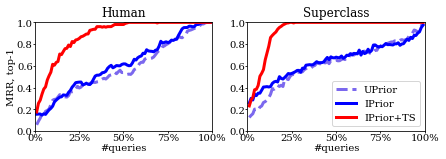

In [32]:
# method_format = {'random_uniform': ('Random Uninformative', 'b', '^', '--'), 
#                  'random_informed': ('Random Informative', 'b', '^', '-'), 
#                  #'active': ('TS Uninformative', 'r', '+', '--'), 
#                  'active_informed': ('TS Informative', 'r', '+', '-'),
#                 }

method_format = {'random_uniform': ('UPrior', 'mediumslateblue', '^', '--'), 
                 'random_informed': ('IPrior', 'b', '^', '-'), 
                 #'active': ('TS Uninformative', 'r', '+', '--'), 
                 'active_informed': ('IPrior+TS', 'r', '+', '-'),
                }


def plot_topk_cost(ax: mpl.axes.Axes,
                   experiment_name: str,
                   eval_metric: str,
                   pool_size: int,
                  topk: int) -> None:

    for method_name in method_format:
        legend_name, color, marker, linestyle = method_format[method_name] 
        metric_eval = np.load(
            RESULTS_DIR + experiment_name + ('/%s_%s_top%d_pseudocount1.0.npy' % (method_name, eval_metric, topk)))
        x = np.arange(len(metric_eval)) * LOG_FREQ / pool_size
        plot_step=10
        ax.plot(x[10::plot_step], metric_eval[10::plot_step], label=legend_name, 
                linewidth=3, color=color, linestyle=linestyle)

    cutoff = len(metric_eval) - 1
    ax.set_xlim(0, cutoff * LOG_FREQ / pool_size)
    ax.set_ylim(0, 1.0)
    xmin, xmax = ax.get_xlim()
    step = ((xmax - xmin) / 4.0001)
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
    ax.xaxis.set_ticks(np.arange(xmin, xmax + 0.001, step))
    ax.yaxis.set_ticks(np.arange(0, 1.01, 0.20))
    ax.tick_params(pad=0.25, length=1.5)

    return ax

def plot_comparison(topk):
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(LINEWIDTH * 0.5, 2),
                        gridspec_kw = {'wspace':0.2, 'hspace':0.25})
    axes[0] = plot_topk_cost(axes[0], experiment_name='human', eval_metric='mrr', pool_size=10000, topk=topk)
    axes[1] = plot_topk_cost(axes[1], experiment_name='superclass', eval_metric='mrr', pool_size=10000, topk=topk)
    
    axes[0].set_ylabel("MRR, top-%d" % topk, labelpad=0.5, fontsize=10)
    #axes[1].set_ylabel("MRR, top-1", labelpad=0.5)
    axes[0].set_xlabel("#queries", labelpad=0.5, fontsize=10)
    axes[1].set_xlabel("#queries", labelpad=0.5, fontsize=10)
    axes[0].set_title('Human', fontsize=12)
    axes[1].set_title('Superclass', fontsize=12)
    axes[0].tick_params(pad=0.2, length=2)
    axes[1].tick_params(pad=0.2, length=2)
    axes[1].legend(fontsize=10)
    fig.tight_layout()
    return fig, axes

topk = 1
fig, axes = plot_comparison(topk=topk)
fig.savefig(FIGURE_DIR + 'cost_comparison_top%d.pdf' % topk, bbox_inches='tight', pad_inches=0)

100.00000149826451


/Users/disiji/Dropbox/current/bayesian-blackbox/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


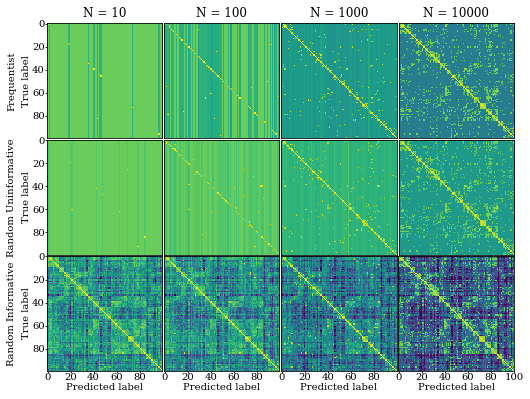

In [26]:
method_names = {'random_uniform': 'Random Uninformative', 
                 'random_informed': 'Random Informative', 
                 'random_no_prior': 'Frequentist',
                }

def plot_confusion(new_idx):
    fig, axes = plt.subplots(3, 4, sharey=True, sharex=True, figsize=(LINEWIDTH * 0.6, 6.4),
                    gridspec_kw = {'wspace':0.01, 'hspace':0.01})

    for idx, method_name in enumerate(['random_no_prior', 'random_uniform', 'random_informed']):
        matrices = (
            np.load(RESULTS_DIR + 'superclass/%s_confusion_log_top1_pseudocount1.0.npy' % method_name)[:, new_idx,
            :][:, :, new_idx])
        if method_name in ['random_informed', 'active_informed']:
            prior = (np.load(COST_INFORMED_PRIOR_FILE))[new_idx, :][:, new_idx]
            print(prior.sum())
        else:
            prior = np.ones((100, 100)) * 1. / 100

        for (i, num_samples) in enumerate([0, 9, 99, 999]):
            matrix = matrices[num_samples]
            #matrix = matrix / matrix.sum(axis=1)[:, np.newaxis]
            axes[idx][i].imshow(np.log(matrix).T, vmin=-20, vmax=0)
            axes[idx][i].xaxis.set_ticks(np.arange(0, 101, 20))
            axes[idx][i].yaxis.set_ticks(np.arange(0, 101, 20))
            if i == 0:
                axes[idx, i].set_ylabel("True label", labelpad=0.5)
            if idx == 2:
                axes[idx, i].set_xlabel("Predicted label", labelpad=0.5)
            if i > 0:
                axes[idx, i].tick_params(left=False)
                axes[idx, i].tick_params(labelleft=False)
            axes[0, i].tick_params(bottom=False)
            axes[0, i].tick_params(labelbottom=False)
            axes[idx, i].tick_params(pad=0.2, length=2)
            axes[0, i].set_title("N = %d" % ((1+num_samples)*10))

        axes[idx, 0].text(-35, 50, method_names[method_name], verticalalignment='center', rotation=90)
        
    fig.tight_layout()
    return fig, axes
        
fig, axes = plot_confusion(new_idx)
fig.savefig(FIGURE_DIR + 'cost_confusion_matrix.pdf', bbox_inches='tight', pad_inches=0)